In [1]:
import pickle
import numpy as np
import pandas as pd

## 0. Analizar Configuraciones

### 0.1 Parámetros promedio de SMPL

In [3]:
smpl_mean_params = np.load('additional/neutral_smpl_mean_params_6dpose.npz')

In [5]:
len(smpl_mean_params)

3

In [7]:
smpl_mean_params['cam']

array([0.9, 0. , 0. ], dtype=float32)

In [8]:
smpl_mean_params['shape']

array([ 0.20560974,  0.33556297, -0.35068282,  0.35612896,  0.41754073,
        0.03088791,  0.30475676,  0.23613405,  0.20912662,  0.31212646],
      dtype=float32)

In [9]:
smpl_mean_params['pose']

array([ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00, -1.00000048e+00,
        0.00000000e+00,  1.50995817e-07,  9.95594144e-01, -9.35074911e-02,
        8.96214917e-02,  9.70808983e-01, -2.75727212e-02, -2.20876053e-01,
        9.95853722e-01,  8.32496583e-02, -7.22568333e-02,  9.68795717e-01,
        5.52654527e-02, -2.33461723e-01,  9.99805868e-01, -1.16801877e-02,
        1.55893452e-02,  9.61456239e-01, -1.20510980e-02,  2.74709910e-01,
        9.93516386e-01,  7.95017406e-02, -1.06274955e-01,  9.03366446e-01,
        4.03832123e-02,  4.21436191e-01,  9.98174787e-01, -5.75351082e-02,
        5.92384301e-02,  8.73740733e-01,  1.17418924e-02,  4.82977092e-01,
        9.99480844e-01, -6.16004784e-03,  5.43189887e-03,  9.99719322e-01,
        3.17586996e-02,  2.28755195e-02,  9.89863694e-01,  5.47103174e-02,
       -5.37955277e-02,  9.98496652e-01, -1.31437480e-01,  3.35601554e-03,
        9.75578487e-01, -1.29129276e-01,  1.39408067e-01,  9.89138842e-01,
        1.69740841e-01, -

In [22]:
smpl_mean_params['pose'].shape

(144,)

## 1. Analizar Datos de Entrenamiento y Evaluación

In [38]:
from data.synthetic_training_dataset import SyntheticTrainingDataset

### 1.1 Datos de Entrenamiento

In [39]:
train_path = './data/amass_up3d_3dpw_train.npz'

train_dataset = SyntheticTrainingDataset(npz_path=train_path, params_from='all')

In [40]:
len(train_dataset)

347962

In [41]:
train_dataset[0]

{'pose': tensor([-2.7344e+01, -1.4954e+00, -5.0242e+00, -3.0735e-01,  6.2436e-02,
          3.1503e-01, -4.8097e-01, -1.3984e-02, -3.1270e-01,  2.9813e-01,
         -2.3007e-02,  1.4938e-02,  8.7894e-01, -1.3737e-01, -1.3880e-01,
          5.9682e-01,  1.2568e-01,  5.7579e-02,  3.2384e-02, -3.5846e-02,
          5.3690e-02, -2.1110e-01,  9.6816e-02, -1.3598e-01, -8.3156e-02,
         -1.7998e-01,  2.9774e-01,  1.3692e-02, -4.3456e-02,  2.4490e-02,
         -2.3649e-01,  2.4035e-01,  2.7845e-01, -1.3573e-01,  9.9988e-02,
         -4.1959e-01, -1.2317e-01,  1.1310e-02,  1.0158e-01,  7.8374e-03,
         -1.5371e-01, -2.3754e-01, -1.0029e-01,  2.0720e-01,  2.0847e-01,
          1.3823e-01, -1.1027e-01, -7.6759e-04,  3.6322e-02, -2.8740e-01,
         -5.9660e-01,  5.3885e-02,  3.8864e-01,  5.4329e-01,  2.4638e-01,
         -1.2175e+00,  2.4618e-01, -3.7457e-03,  1.5001e+00, -4.1864e-01,
          2.5386e-02, -1.0759e-01,  1.1754e-01,  2.8639e-02,  1.1327e-01,
         -1.4226e-01, -2.0009e

In [42]:
train_dataset[0]['pose'].shape

torch.Size([72])

In [43]:
train_dataset[0]['shape'].shape

torch.Size([10])

In [47]:
train_dataset[0]['pose']

tensor([-2.7344e+01, -1.4954e+00, -5.0242e+00, -3.0735e-01,  6.2436e-02,
         3.1503e-01, -4.8097e-01, -1.3984e-02, -3.1270e-01,  2.9813e-01,
        -2.3007e-02,  1.4938e-02,  8.7894e-01, -1.3737e-01, -1.3880e-01,
         5.9682e-01,  1.2568e-01,  5.7579e-02,  3.2384e-02, -3.5846e-02,
         5.3690e-02, -2.1110e-01,  9.6816e-02, -1.3598e-01, -8.3156e-02,
        -1.7998e-01,  2.9774e-01,  1.3692e-02, -4.3456e-02,  2.4490e-02,
        -2.3649e-01,  2.4035e-01,  2.7845e-01, -1.3573e-01,  9.9988e-02,
        -4.1959e-01, -1.2317e-01,  1.1310e-02,  1.0158e-01,  7.8374e-03,
        -1.5371e-01, -2.3754e-01, -1.0029e-01,  2.0720e-01,  2.0847e-01,
         1.3823e-01, -1.1027e-01, -7.6759e-04,  3.6322e-02, -2.8740e-01,
        -5.9660e-01,  5.3885e-02,  3.8864e-01,  5.4329e-01,  2.4638e-01,
        -1.2175e+00,  2.4618e-01, -3.7457e-03,  1.5001e+00, -4.1864e-01,
         2.5386e-02, -1.0759e-01,  1.1754e-01,  2.8639e-02,  1.1327e-01,
        -1.4226e-01, -2.0009e-01, -4.9888e-02, -2.4

In [45]:
train_dataset[0]['pose'][3:]

tensor([-3.0735e-01,  6.2436e-02,  3.1503e-01, -4.8097e-01, -1.3984e-02,
        -3.1270e-01,  2.9813e-01, -2.3007e-02,  1.4938e-02,  8.7894e-01,
        -1.3737e-01, -1.3880e-01,  5.9682e-01,  1.2568e-01,  5.7579e-02,
         3.2384e-02, -3.5846e-02,  5.3690e-02, -2.1110e-01,  9.6816e-02,
        -1.3598e-01, -8.3156e-02, -1.7998e-01,  2.9774e-01,  1.3692e-02,
        -4.3456e-02,  2.4490e-02, -2.3649e-01,  2.4035e-01,  2.7845e-01,
        -1.3573e-01,  9.9988e-02, -4.1959e-01, -1.2317e-01,  1.1310e-02,
         1.0158e-01,  7.8374e-03, -1.5371e-01, -2.3754e-01, -1.0029e-01,
         2.0720e-01,  2.0847e-01,  1.3823e-01, -1.1027e-01, -7.6759e-04,
         3.6322e-02, -2.8740e-01, -5.9660e-01,  5.3885e-02,  3.8864e-01,
         5.4329e-01,  2.4638e-01, -1.2175e+00,  2.4618e-01, -3.7457e-03,
         1.5001e+00, -4.1864e-01,  2.5386e-02, -1.0759e-01,  1.1754e-01,
         2.8639e-02,  1.1327e-01, -1.4226e-01, -2.0009e-01, -4.9888e-02,
        -2.4284e-01, -1.5929e-01,  1.2921e-01,  2.2

In [46]:
train_dataset[0]['pose'][:3]

tensor([-27.3444,  -1.4954,  -5.0242])

### 1.2 Datos de Evaluación

In [59]:
val_path = 'data/up3d_3dpw_val.npz'

val_dataset = SyntheticTrainingDataset(npz_path=val_path, params_from='all')

In [60]:
len(val_dataset)

11836

In [61]:
val_dataset[0]

{'pose': tensor([-2.7808e+01,  4.4019e-01, -4.4615e+00, -1.1451e-01, -3.1743e-02,
          5.8566e-02, -3.5597e-01, -7.7979e-03, -5.5962e-02,  2.0834e-01,
         -2.6680e-02, -5.1161e-03,  6.9643e-01, -1.3414e-01, -9.9954e-02,
          6.6915e-01, -5.3203e-02,  7.7806e-02,  1.8558e-02,  6.8516e-03,
          3.0969e-03, -8.0196e-02,  3.9522e-02, -3.1556e-02, -9.6071e-02,
         -1.8827e-01,  2.0305e-01,  2.9115e-02, -3.9537e-02, -1.3958e-02,
         -3.4169e-01,  2.7468e-01,  1.2448e-01, -1.2524e-01,  1.3106e-01,
         -3.6924e-01, -1.7380e-01, -2.0098e-02,  6.3947e-02,  1.9406e-02,
          1.4228e-02, -3.4996e-01, -8.6720e-02,  7.1075e-02,  3.0278e-01,
          1.7379e-01, -9.2989e-02, -4.4066e-02,  1.0234e-01, -3.2872e-01,
         -9.3252e-01,  2.0622e-01,  2.8756e-01,  8.7007e-01,  2.8338e-01,
         -1.8472e+00,  6.2886e-01,  4.2728e-02,  1.9275e+00, -7.2214e-01,
         -1.7678e-01, -1.2305e-01,  2.1278e-01, -1.1537e-02,  1.7261e-01,
         -2.2975e-01, -8.9399e

In [62]:
val_dataset[0]['pose'].shape

torch.Size([72])

In [63]:
val_dataset[0]['shape'].shape

torch.Size([10])

## 2. STARPS evaluación con SSP-3D

### 2.1 Evaluacion con pesos del autor

In [2]:
with open('evaluation/results/evaluation_measurement_exp_0.pickle', 'rb') as fp:
    evaluation_measurement = pickle.load(fp)

In [3]:
weights = 0
for weight in evaluation_measurement['weight']:
    weights = weights + abs(weight)
    
mean_error_weights = weights/len(evaluation_measurement['weight'])

In [4]:
heights = 0
for height in evaluation_measurement['height']:
    heights = heights + abs(height)
    
mean_error_heights = heights/len(evaluation_measurement['height'])

In [5]:
chests = 0
for chest in evaluation_measurement['chest']:
    chests = chests + abs(chest)
    
mean_error_chests = chests/len(evaluation_measurement['chest'])

In [6]:
hips = 0
for hip in evaluation_measurement['hip']:
    hips = hips + abs(hip)
    
mean_error_hips = hips/len(evaluation_measurement['hip'])

In [7]:
new_eva = np.array(evaluation_measurement['pve_neutral'])
df = pd.DataFrame(new_eva)
means = df.mean(axis = 0)
total_eval = sum(means) / len(means) 

In [8]:
print("ERROR MEDIO PARA PESO: ", mean_error_weights)
print("ERROR MEDIO PARA ALTURA (cm): ", mean_error_heights*100)
print("ERROR MEDIO PARA PECHO (cm): ", mean_error_chests*100)
print("ERROR MEDIO PARA CADERA (cm): ", mean_error_hips*100)
print('PVE-T-SC: ', total_eval)

ERROR MEDIO PARA PESO:  14.44241560286342
ERROR MEDIO PARA ALTURA (cm):  8.213333329475752
ERROR MEDIO PARA PECHO (cm):  8.209255357985912
ERROR MEDIO PARA CADERA (cm):  10.0422174476406
PVE-T-SC:  0.015567316065227453


### 2.2 Evaluacion con 20 épocas de entrenamiento

In [9]:
with open('evaluation/results/evaluation_measurement_exp_2.pickle', 'rb') as fp:
    evaluation_measurement = pickle.load(fp)

In [10]:
weights = 0
for weight in evaluation_measurement['weight']:
    weights = weights + abs(weight)
    
mean_error_weights = weights/len(evaluation_measurement['weight'])

In [11]:
heights = 0
for height in evaluation_measurement['height']:
    heights = heights + abs(height)
    
mean_error_heights = heights/len(evaluation_measurement['height'])

In [12]:
chests = 0
for chest in evaluation_measurement['chest']:
    chests = chests + abs(chest)
    
mean_error_chests = chests/len(evaluation_measurement['chest'])

In [13]:
hips = 0
for hip in evaluation_measurement['hip']:
    hips = hips + abs(hip)
    
mean_error_hips = hips/len(evaluation_measurement['hip'])

In [14]:
new_eva = np.array(evaluation_measurement['pve_neutral'])
df = pd.DataFrame(new_eva)
means = df.mean(axis = 0)
total_eval = sum(means) / len(means) 

In [15]:
print("ERROR MEDIO PARA PESO: ", mean_error_weights)
print("ERROR MEDIO PARA ALTURA (cm): ", mean_error_heights*100)
print("ERROR MEDIO PARA PECHO (cm): ", mean_error_chests*100)
print("ERROR MEDIO PARA CADERA (cm): ", mean_error_hips*100)
print('PVE-T-SC: ', total_eval)

ERROR MEDIO PARA PESO:  15.860774117569008
ERROR MEDIO PARA ALTURA (cm):  6.148091138463994
ERROR MEDIO PARA PECHO (cm):  8.935982160368997
ERROR MEDIO PARA CADERA (cm):  11.835724145585788
PVE-T-SC:  0.016572387057190278


### 2.3 Evaluación con 30 épocas de entrenamiento

In [40]:
with open('evaluation/results/evaluation_measurement_exp_3.pickle', 'rb') as fp:
    evaluation_measurement = pickle.load(fp)

In [41]:
weights = 0
for weight in evaluation_measurement['weight']:
    weights = weights + abs(weight)
    
mean_error_weights = weights/len(evaluation_measurement['weight'])

In [42]:
heights = 0
for height in evaluation_measurement['height']:
    heights = heights + abs(height)
    
mean_error_heights = heights/len(evaluation_measurement['height'])

In [43]:
chests = 0
for chest in evaluation_measurement['chest']:
    chests = chests + abs(chest)
    
mean_error_chests = chests/len(evaluation_measurement['chest'])

In [44]:
hips = 0
for hip in evaluation_measurement['hip']:
    hips = hips + abs(hip)
    
mean_error_hips = hips/len(evaluation_measurement['hip'])

In [45]:
new_eva = np.array(evaluation_measurement['pve_neutral'])
df = pd.DataFrame(new_eva)
means = df.mean(axis = 0)
total_eval = sum(means) / len(means) 

In [46]:
print("ERROR MEDIO PARA PESO: ", mean_error_weights)
print("ERROR MEDIO PARA ALTURA (cm): ", mean_error_heights*100)
print("ERROR MEDIO PARA PECHO (cm): ", mean_error_chests*100)
print("ERROR MEDIO PARA CADERA (cm): ", mean_error_hips*100)
print('PVE-T-SC: ', total_eval)

ERROR MEDIO PARA PESO:  13.93969428897741
ERROR MEDIO PARA ALTURA (cm):  6.98029809470767
ERROR MEDIO PARA PECHO (cm):  8.125764775514027
ERROR MEDIO PARA CADERA (cm):  10.798468105517376
PVE-T-SC:  0.01589160358049354


### 2.4 Evaluación con 40 épocas de entrenamiento

In [38]:
with open('evaluation/results/evaluation_measurement_exp_4.pickle', 'rb') as fp:
    evaluation_measurement = pickle.load(fp)
    
weights = 0
for weight in evaluation_measurement['weight']:
    weights = weights + abs(weight)
    
mean_error_weights = weights/len(evaluation_measurement['weight'])

heights = 0
for height in evaluation_measurement['height']:
    heights = heights + abs(height)
    
mean_error_heights = heights/len(evaluation_measurement['height'])

chests = 0
for chest in evaluation_measurement['chest']:
    chests = chests + abs(chest)
    
mean_error_chests = chests/len(evaluation_measurement['chest'])

hips = 0
for hip in evaluation_measurement['hip']:
    hips = hips + abs(hip)
    
mean_error_hips = hips/len(evaluation_measurement['hip'])

new_eva = np.array(evaluation_measurement['pve_neutral'])
df = pd.DataFrame(new_eva)
means = df.mean(axis = 0)
total_eval = sum(means) / len(means) 

In [39]:
print("ERROR MEDIO PARA PESO: ", mean_error_weights)
print("ERROR MEDIO PARA ALTURA (cm): ", mean_error_heights*100)
print("ERROR MEDIO PARA PECHO (cm): ", mean_error_chests*100)
print("ERROR MEDIO PARA CADERA (cm): ", mean_error_hips*100)
print('PVE-T-SC: ', total_eval)

ERROR MEDIO PARA PESO:  13.93969428897741
ERROR MEDIO PARA ALTURA (cm):  6.98029809470767
ERROR MEDIO PARA PECHO (cm):  8.125764775514027
ERROR MEDIO PARA CADERA (cm):  10.798468105517376
PVE-T-SC:  0.01589160358049354


### 2.3 Gráfico de entrenamiento

In [26]:
import matplotlib.pyplot as plt

In [27]:
with open('logs/straps_model_transfer_learning_logs_exp001.pkl', 'rb') as f:
    data = pickle.load(f)

In [34]:
data.keys()

dict_keys(['train_losses', 'val_losses', 'train_verts_losses', 'val_verts_losses', 'train_shape_params_losses', 'val_shape_params_losses', 'train_pose_params_losses', 'val_pose_params_losses', 'train_joints2D_losses', 'val_joints2D_losses', 'train_joints3D_losses', 'val_joints3D_losses', 'train_pves', 'val_pves', 'train_pves_sc', 'val_pves_sc', 'train_pves_pa', 'val_pves_pa', 'train_pve-ts', 'val_pve-ts', 'train_pve-ts_sc', 'val_pve-ts_sc', 'train_pve-ts_pa', 'val_pve-ts_pa', 'train_mpjpes', 'val_mpjpes', 'train_mpjpes_sc', 'val_mpjpes_sc', 'train_mpjpes_pa', 'val_mpjpes_pa', 'train_pose_mses', 'val_pose_mses', 'train_shape_mses', 'val_shape_mses', 'train_joints2D_l2es', 'val_joints2D_l2es'])

#### 2.3.1 Total de pérdida

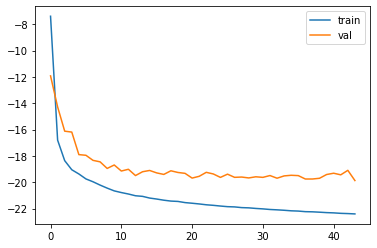

In [28]:
plt.plot(data['train_losses'], label='train') 
plt.plot(data['val_losses'], label='val') 
plt.legend()
plt.show()

#### 2.3.2 MPJPE-PA

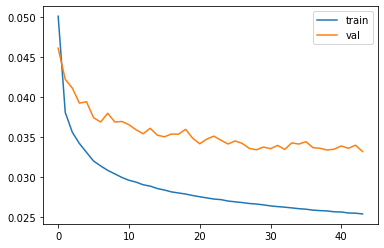

In [29]:
plt.plot(data['train_mpjpes_pa'], label='train') 
plt.plot(data['val_mpjpes_pa'], label='val') 
plt.legend()
plt.show()

#### 2.3.2 Pérdida en vertices

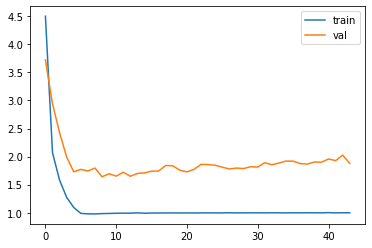

In [30]:
plt.plot(data['train_verts_losses'], label='train') 
plt.plot(data['val_verts_losses'], label='val') 
plt.legend()
plt.show()

#### 2.3.3 Pérdida en parámetros de forma

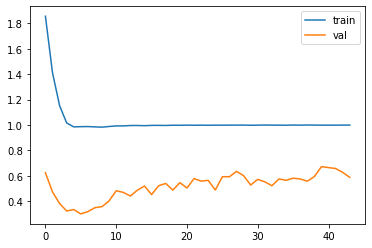

In [31]:
plt.plot(data['train_shape_params_losses'], label='train') 
plt.plot(data['val_shape_params_losses'], label='val') 
plt.legend()
plt.show()

#### 2.3.4 Pérdida en parámetros de pose

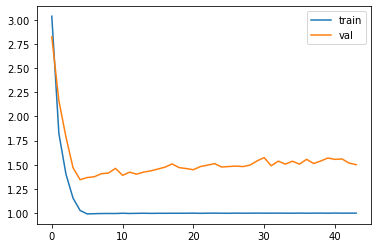

In [32]:
plt.plot(data['train_pose_params_losses'], label='train') 
plt.plot(data['val_pose_params_losses'], label='val') 
plt.legend()
plt.show()

#### 2.3.5 Pérdida en Articulaciones 2D

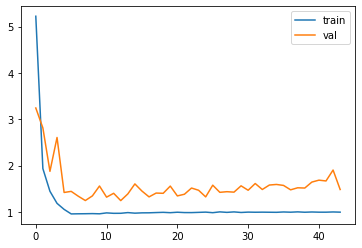

In [33]:
plt.plot(data['train_joints2D_losses'], label='train') 
plt.plot(data['val_joints2D_losses'], label='val') 
plt.legend()
plt.show()

#### 2.3.6 Pérdida en Articulaciones 3D

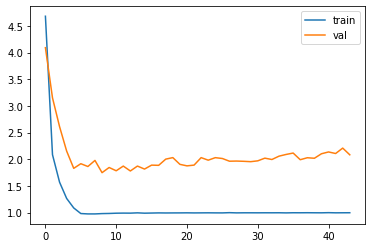

In [34]:
plt.plot(data['train_joints3D_losses'], label='train') 
plt.plot(data['val_joints3D_losses'], label='val') 
plt.legend()
plt.show()

#### 2.3.7 Error por vertice en pose neutral despues de la correción de escala

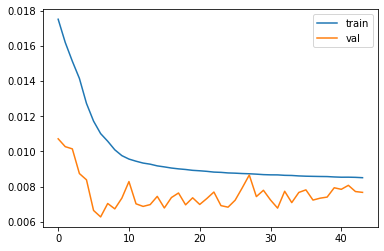

In [35]:
plt.plot(data['train_pve-ts_sc'], label='train') 
plt.plot(data['val_pve-ts_sc'], label='val') 
plt.legend()
plt.show()

#### 2.3.8 Error cuadrático medio de forma

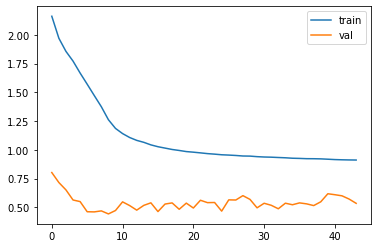

In [36]:
plt.plot(data['train_shape_mses'], label='train') 
plt.plot(data['val_shape_mses'], label='val') 
plt.legend()
plt.show()

#### 2.3.9 Error cuadrático medio de pose

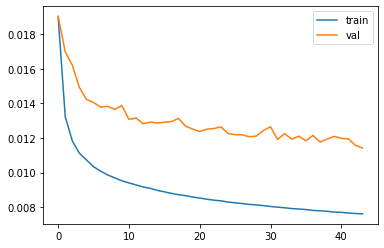

In [37]:
plt.plot(data['train_pose_mses'], label='train') 
plt.plot(data['val_pose_mses'], label='val') 
plt.legend()
plt.show()